# Методы оптимизации в машинном обучении

## Якунина Е. Н.

In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import oracles
import optimization
import presubmit_tests
from sklearn.datasets import load_svmlight_file

Проверка правильности реализации подсчета градиента и гессиана логистической регрессии с помощью разностных производных

In [2]:
for i in range(3):
    A = np.random.randint(-10, 10, size = 8).reshape(4, 2)
    b = np.random.randint(-10, 10, size = 4)
    m = b.size
    regr_coef = 1 / m
    lg = oracles.create_log_reg_oracle(A, b, regr_coef, oracle_type='usual')
    x_0 = np.random.randint(-10, 10, size = 2)
    print('Градиент:', np.round(lg.grad(x_0), 2), '\n' 'Разностный градиент:', 
          np.round(oracles.grad_finite_diff(lg.func, x_0, eps=1e-8), 2), '\n\n' 'Гессиан:', np.round(lg.hess(x_0), 2), 
          '\n' 'Разностный гессиан:', np.round(oracles.hess_finite_diff(lg.func, x_0, eps=1e-5), 2), '\n\n')

Градиент: [-24.75  11.  ] 
Разностный градиент: [-24.75  11.  ] 

Гессиан: [[ 0.25 -0.  ]
 [-0.    0.25]] 
Разностный гессиан: [[0.25 0.  ]
 [0.   0.25]] 


Градиент: [-9.25  6.75] 
Разностный градиент: [-9.25  6.75] 

Гессиан: [[0.25 0.  ]
 [0.   0.25]] 
Разностный гессиан: [[0.25 0.  ]
 [0.   0.25]] 


Градиент: [-7.   1.5] 
Разностный градиент: [-7.   1.5] 

Гессиан: [[ 0.25 -0.  ]
 [-0.    0.25]] 
Разностный гессиан: [[0.25 0.  ]
 [0.   0.25]] 




Проверка автоматических предварительных тестов presubmit_tests.py

In [3]:
presubmit_tests.test_python3()
presubmit_tests.test_QuadraticOracle()
presubmit_tests.test_log_reg_usual()
presubmit_tests.test_log_reg_oracle_calls()
presubmit_tests.test_grad_finite_diff_1()
presubmit_tests.test_grad_finite_diff_2()
presubmit_tests.test_hess_finite_diff_1()
presubmit_tests.test_hess_finite_diff_2()
presubmit_tests.test_line_search()
presubmit_tests.test_gd_basic()
presubmit_tests.test_newton_basic()
presubmit_tests.test_newton_1d()

ok
ok
ok
ok


### Эксперимент: Траектория градиентного спуска на квадратичной функции

In [4]:
options = [{'method': 'Armijo'}, {'method': 'Wolfe'}, {'method': 'Constant', 'c': 0.1}]
x_0 = [np.array([0, 0]), np.array([1, 1]), np.array([-1, -1]), np.array([2, -2]), np.array([-2, 2])]
colors = ['darkcyan', 'darkmagenta', 'royalblue']

In [5]:
def plot_graph(method, x_0, oracle, colors):
    xrange = [-6, 6]
    yrange = [-5, 5]
    levels = [0, 0.25, 1, 4, 9, 16, 25]
    
    xx = np.linspace(xrange[0], xrange[1], 100)
    yy = np.linspace(yrange[0], yrange[1], 100)
    X, Y = np.meshgrid(xx, yy)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i, j] = oracle.func(np.array([X[i, j], Y[i, j]]))
        
    for i in x_0:
        fig, ax = plt.subplots(1, 3, figsize=(20, 5))    
        for j, c in zip(range(len(method)), colors):
            CS = ax[j].contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)
            ax[j].clabel(CS, inline=1, fontsize=8) 
            ax[j].grid()  
        
            [x_star, msg, history] = optimization.gradient_descent(oracle, i, tolerance=1e-5, max_iter=10000, 
                                                      line_search_options=method[j], trace=True, display=False)
            x_values, y_values = zip(*history['x'])
            ax[j].plot(x_values, y_values, marker = '*', linewidth=3.0, ms=15.0, alpha=1.0, c=c)
            ax[j].set_title('Метод {0} \n Начальная точка {1} \n Число итераций = {2}'.format(method[j]['method'], i,
                                                                                              len(history['x']) - 1), 
                            fontsize = 13)

Первая функция

Число обусловленности: 2.1881553461289505


C:\Users\katya\AppData\Local\Temp/ipykernel_22424/38024739.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = ax[j].contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


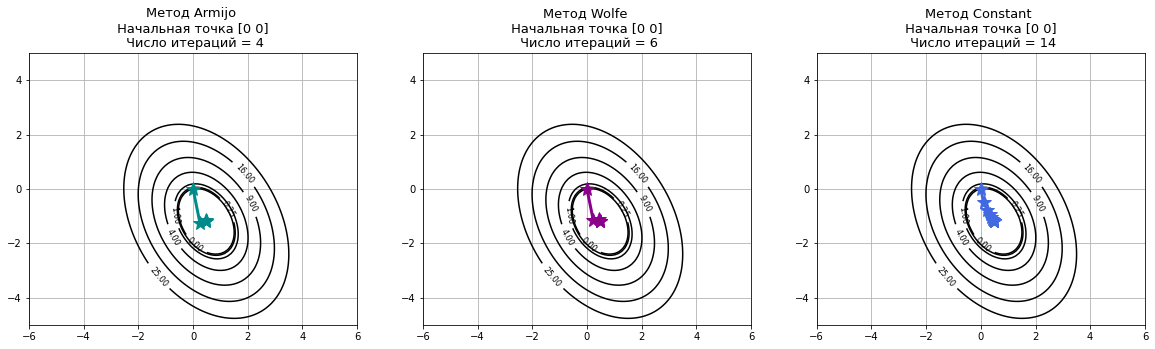

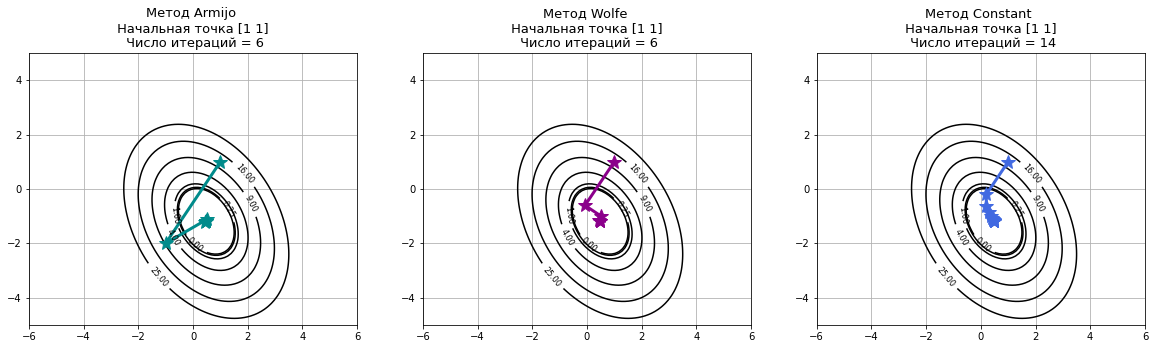

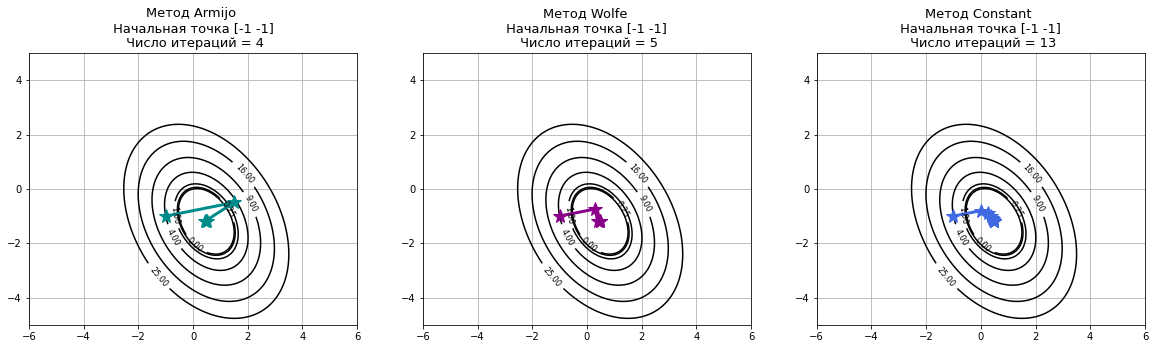

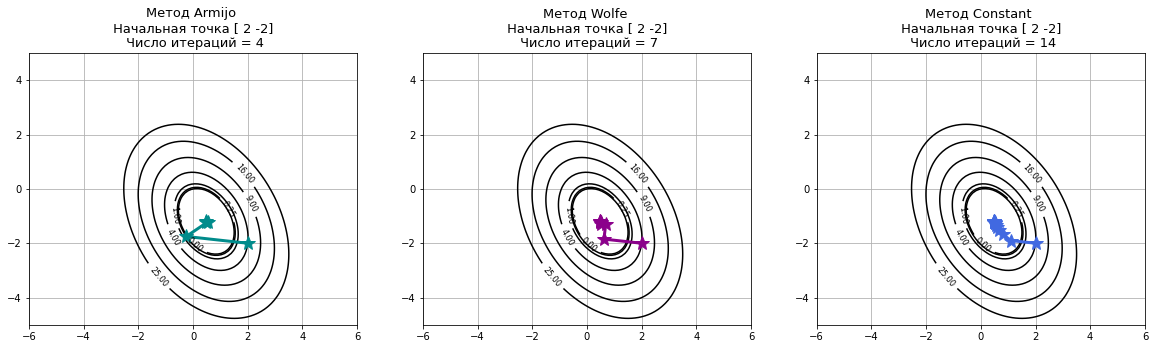

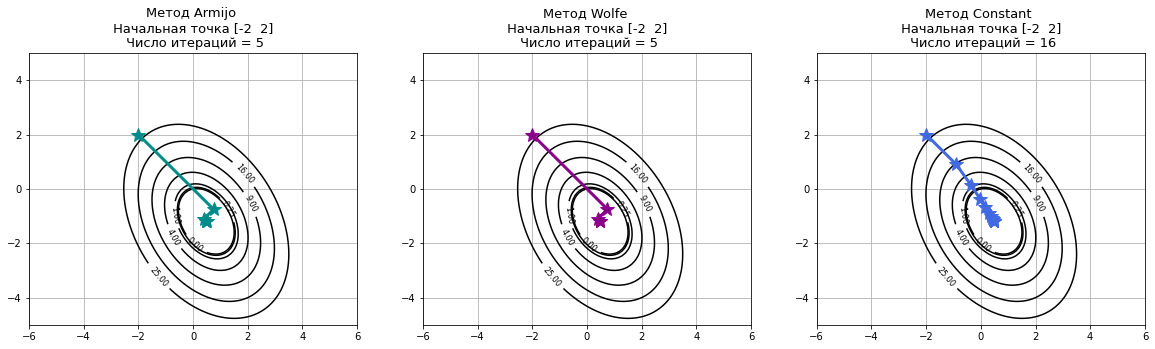

In [6]:
A1 = np.array([[7.0, 2.0], [2.0, 5.0]])
b1 = np.array([1.0, -5.0])
qv1 = oracles.QuadraticOracle(A1, b1)
print('Число обусловленности:', np.linalg.cond(A1))
plot_graph(options, x_0, qv1, colors)

Вторая функция

Число обусловленности: 10.403882032022079


C:\Users\katya\AppData\Local\Temp/ipykernel_22424/38024739.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = ax[j].contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


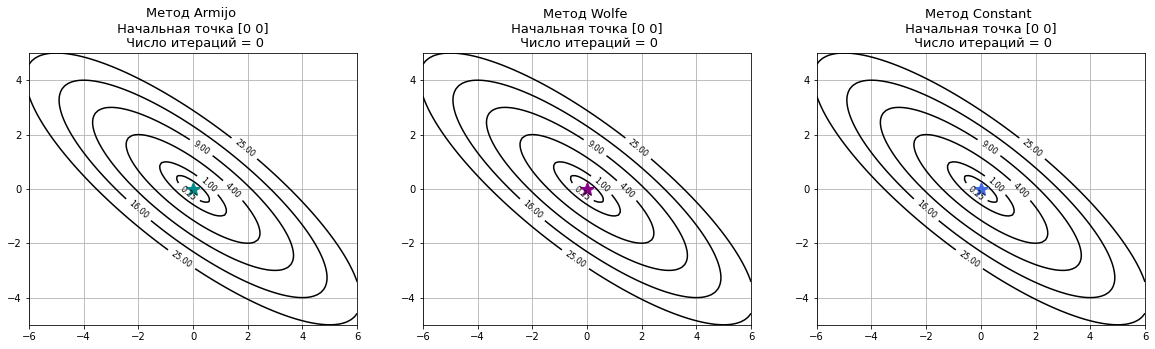

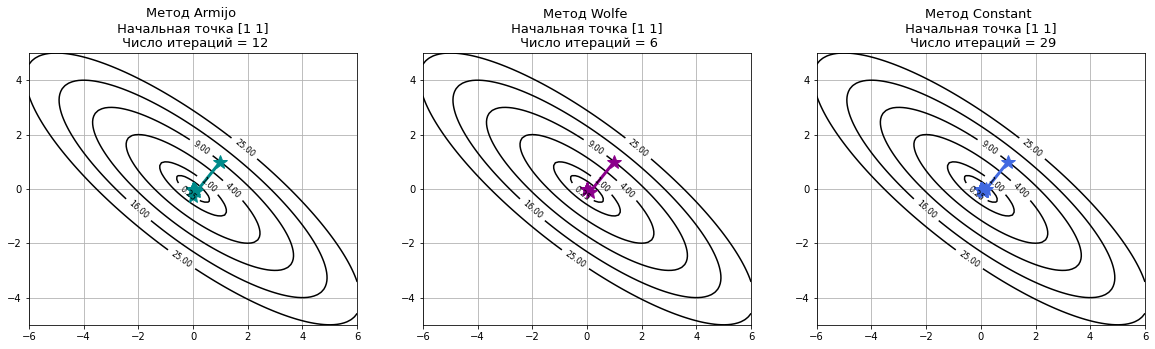

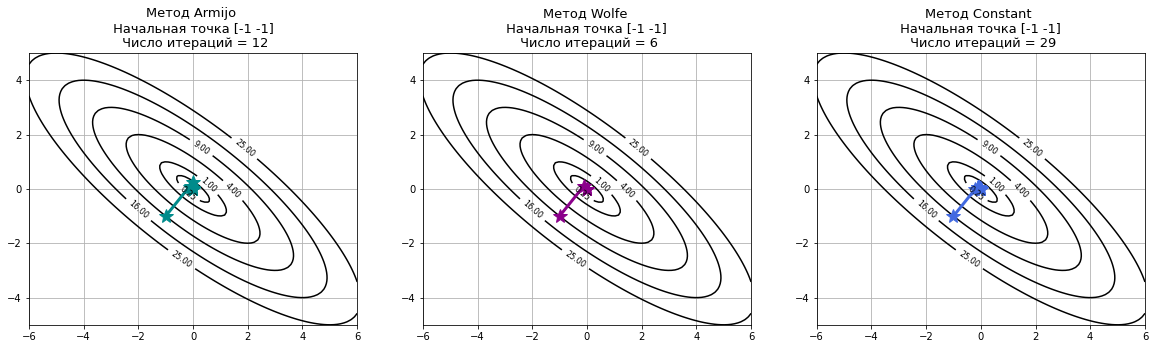

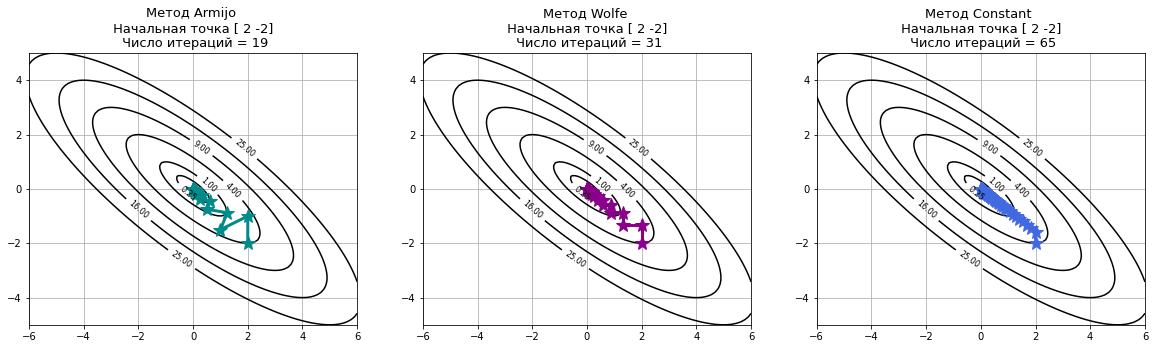

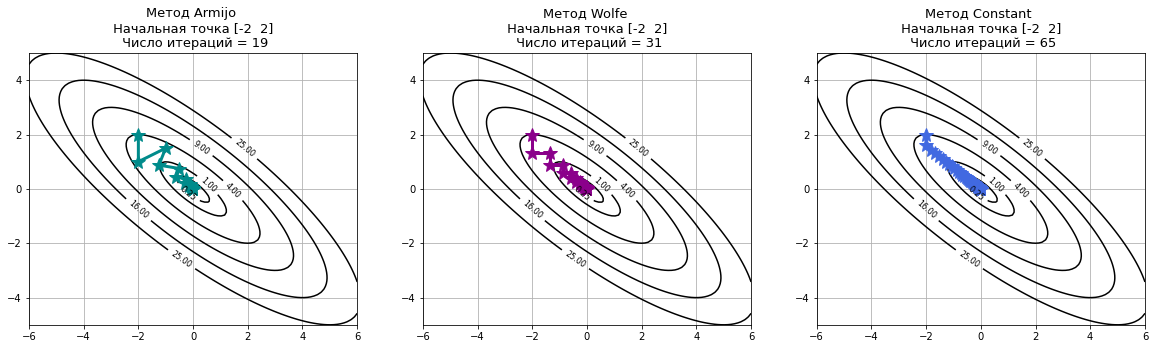

In [8]:
A2 = np.array([[4.0, 4.0], [4.0, 6.0]])
b2 = np.array([0.0, 0.0])
qv2 = oracles.QuadraticOracle(A2, b2)
print('Число обусловленности:', np.linalg.cond(A2))
plot_graph(options, x_0, qv2, colors)

Третья функция

Число обусловленности: 22.45546741550743


C:\Users\katya\AppData\Local\Temp/ipykernel_22424/38024739.py:17: UserWarning: The following kwargs were not used by contour: 'linewidth'
  CS = ax[j].contour(X, Y, Z, levels=levels, colors='k', linewidth=4.0)


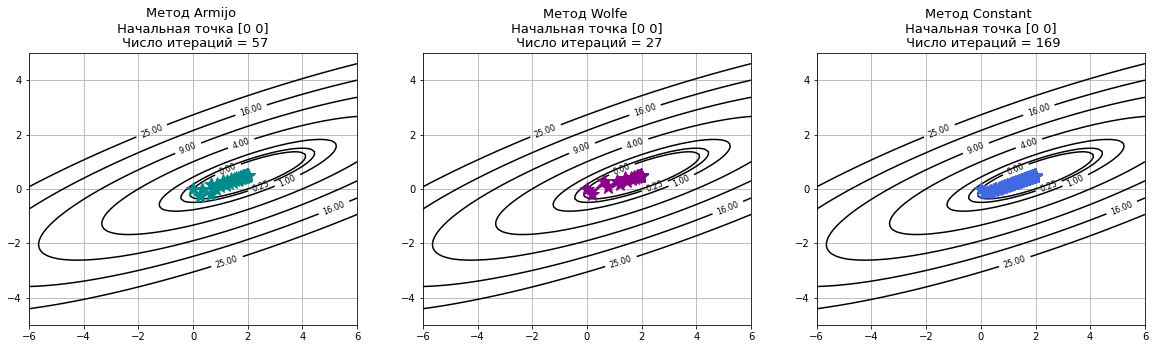

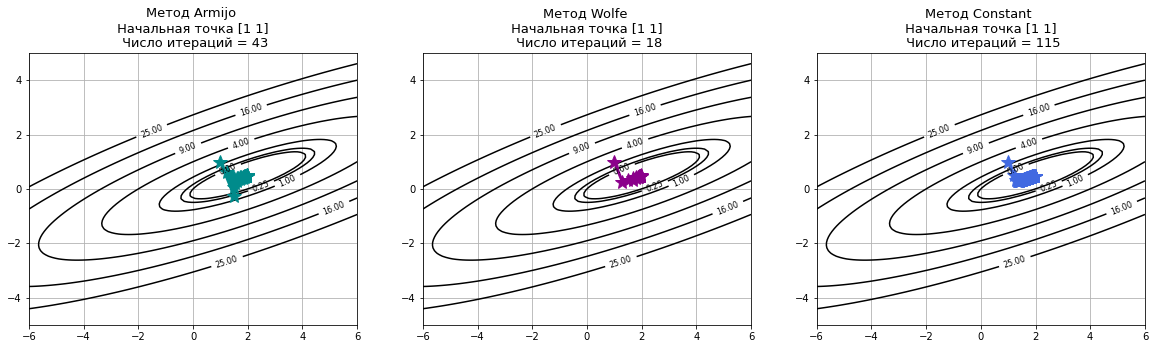

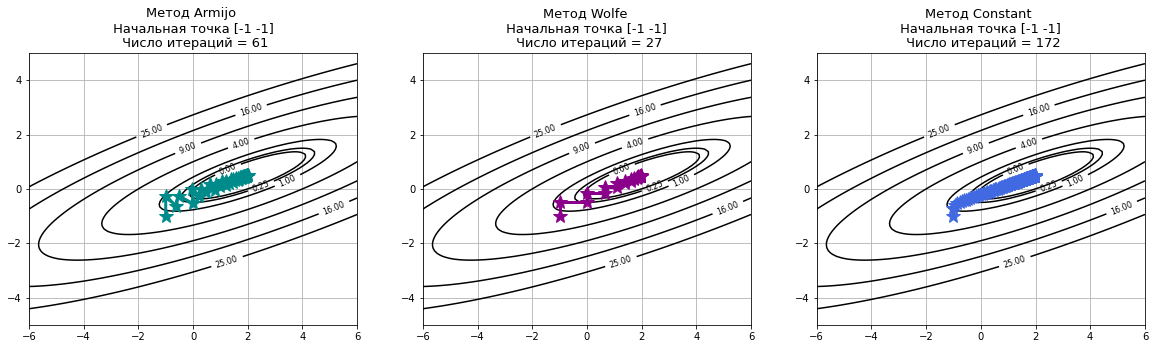

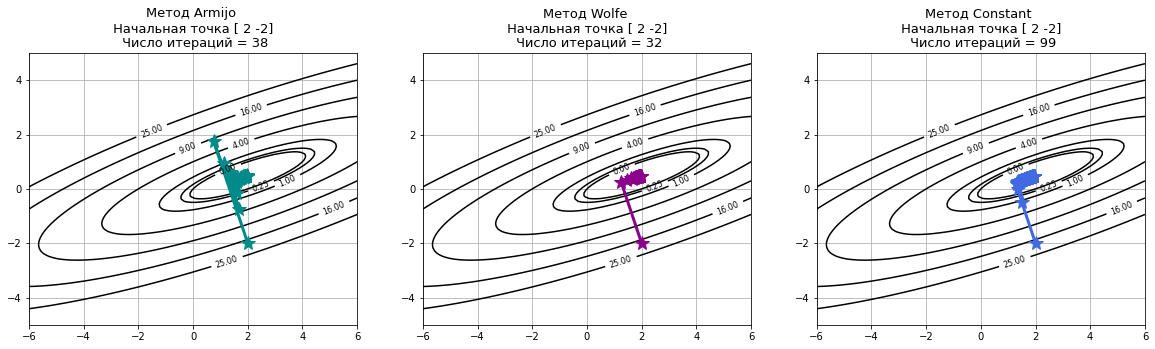

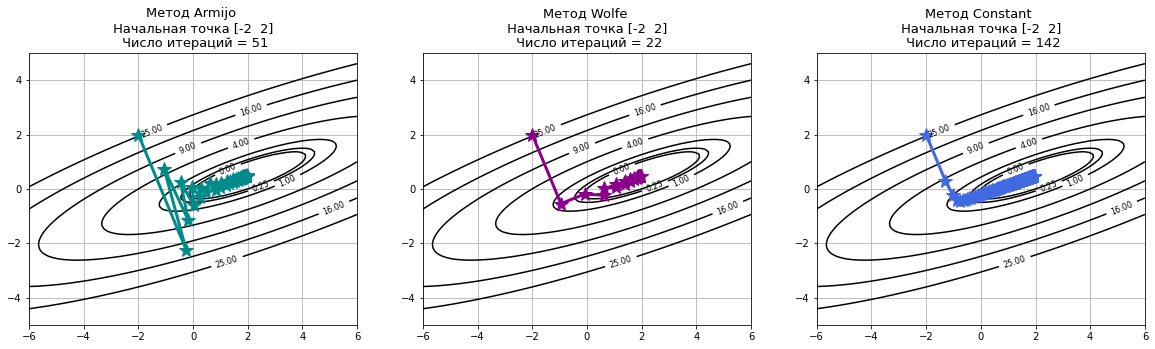

In [9]:
A3 = np.array([[1.0, -2.0], [-2.0, 6.0]])
b3 = np.array([1.0, -1.0])
qv3 = oracles.QuadraticOracle(A3, b3)
print('Число обусловленности:', np.linalg.cond(A3))
plot_graph(options, x_0, qv3, colors)

При увеличении числа обусловленности матрицы число итераций по большей мере растет, сходимость происходит более скачкообразно. Чем ближе исходная точка, тем меньше итераций требуется для нахождения минимума. В большинстве случаев наименьшее число итераций проводится при использовании метода Wolfe, а наибольшее - при методе Constant.

### Эксперимент: Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства.

In [2]:
options = [{'method': 'Armijo'}, {'method': 'Wolfe'}, {'method': 'Constant', 'c': 0.01}]
n = np.logspace(1, 5, 5)
k = np.linspace(1, 100, 10)
colors = ['darkviolet', 'turquoise', 'yellow', 'salmon', 'green']
seeds = [15, 28, 35, 66, 78, 103, 169, 246, 331, 556]

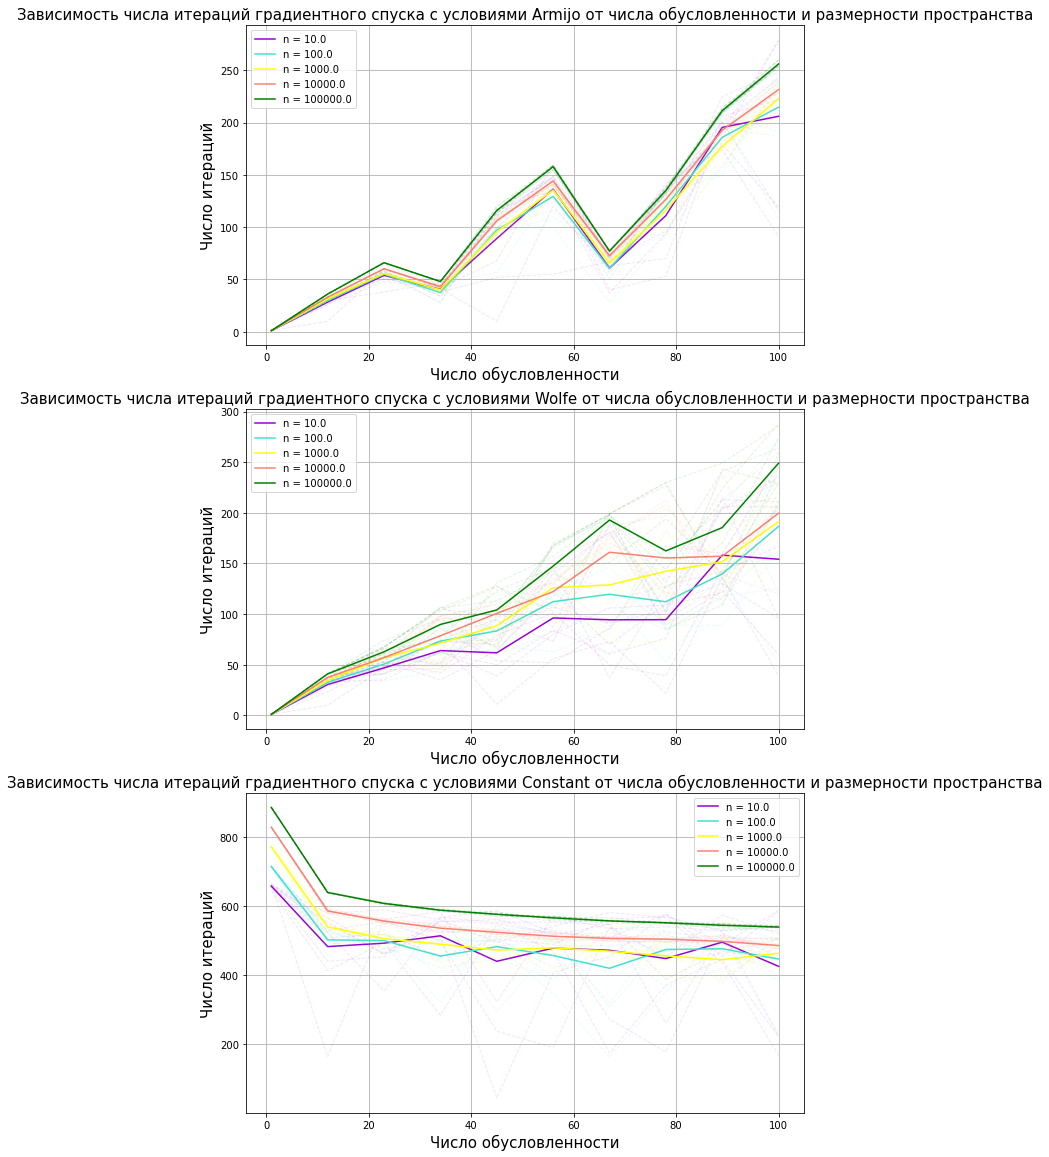

In [12]:
fig, ax = plt.subplots(len(options), 1, figsize = (10, 20))
for m in range(len(options)):
    for i, color in zip(range(len(n)), colors):
        T = np.zeros(len(k))
        for s in seeds:
            np.random.seed(s)
            iterations = np.zeros(len(k))
            for j in range(len(k)):
                a = ((k[j] - 1) * np.random.rand(1, int(n[i])) + 1).ravel()
                p1, p2 = np.random.randint(0, len(a)), np.random.randint(0, len(a))
                while p1 == p2:
                    p2 = np.random.randint(0, len(a))
                a[p1], a[p2] = 1, k[j]
                A = scipy.sparse.diags(a)
                b = (3 * np.random.rand(1, int(n[i]))).ravel()
                qv = oracles.QuadraticOracle(A, b)
                _, _, history = optimization.gradient_descent(qv, np.zeros(len(b)), tolerance=1e-5, max_iter=10000, 
                                                              line_search_options=options[m], trace=True)
                iterations[j] = len(history['func']) - 1
            T = T + iterations
            ax[m].plot(k, iterations, '--', color = color, linewidth = 1, alpha = 0.1)
        ax[m].plot(k, T / len(seeds), color = color, linewidth=1.5, label = 'n = {0}'.format(n[i]))
        ax[m].set_title('Зависимость числа итераций градиентного спуска с условиями {0} от числа обусловленности и размерности '
                        'пространства'.format(options[m]['method']), fontsize = 15)
        ax[m].set_xlabel('Число обусловленности', fontsize = 15)
        ax[m].set_ylabel('Число итераций', fontsize = 15)
        ax[m].grid()
        ax[m].legend()

В целом, при увеличении числа обуcловленности число итераций увеличивается, но при использовании константного выбора шага число итераций наоборот уменьшалось. Разница между количеством итераций в зависимости от размерности пространства минимальна, при большей размерности число итераций увеличивается при одинаковом числе обусловленности несильно. 

### Эксперимент: Сравнение методов градиентного спуска и Ньютона на реальной задаче логистической регрессии

Данные w8a

In [11]:
A, b = load_svmlight_file('w8a.txt')
x_0 = np.zeros(A.shape[1])
reg_coef = 1 / A.shape[0]
logreg = oracles.create_log_reg_oracle(A, b, reg_coef)
print('Размерность пространства:', A.shape[1], '\nКоличество признаков:', A.shape[0])

Размерность пространства: 300 
Количество признаков: 49749


In [14]:
[x_star_gd, msg_gd, history_gd] = optimization.gradient_descent(logreg, x_0, tolerance=1e-5, max_iter=10000, 
                                                                line_search_options={'method': 'Wolfe'}, trace=True)

In [15]:
[x_star_newt, msg_newt, history_newt] = optimization.gradient_descent(logreg, x_0, tolerance=1e-5, max_iter=10000, 
                                                                      line_search_options={'method': 'Wolfe'}, trace=True)

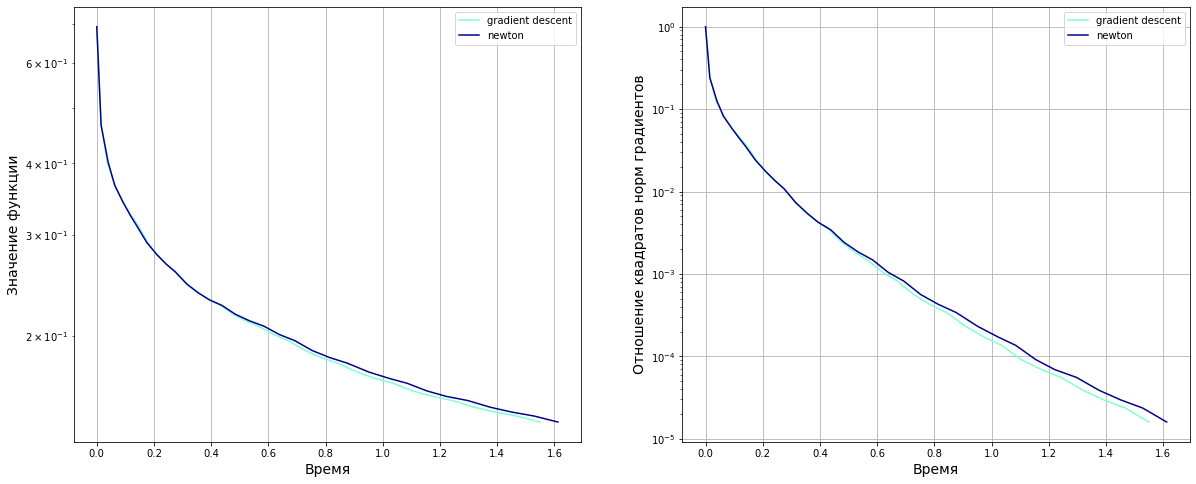

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].plot(history_gd['time'], history_gd['func'], c = 'aquamarine', label = 'gradient descent')
ax[0].plot(history_newt['time'], history_newt['func'], c = 'darkblue', label = 'newton')
ax[0].set_xlabel('Время', fontsize = 14)
ax[0].set_ylabel('Значение функции', fontsize = 14)
ax[0].set_yscale('log')
ax[0].grid()
ax[0].legend()

norms_gd = history_gd['grad_norm'] ** 2 / (history_gd['grad_norm'][0]) ** 2
norms_newt = history_newt['grad_norm'] ** 2 / (history_newt['grad_norm'][0]) ** 2

ax[1].plot(history_gd['time'], norms_gd, c = 'aquamarine', label = 'gradient descent')
ax[1].plot(history_newt['time'], norms_newt, c = 'darkblue', label = 'newton')
ax[1].set_xlabel('Время', fontsize = 14)
ax[1].set_ylabel('Отношение квадратов норм градиентов', fontsize = 14)
ax[1].set_yscale('log')
ax[1].grid()
ax[1].legend()

Данные gisette_scale

In [9]:
A_, b_ = load_svmlight_file('gisette_scale')
x_0_ = np.zeros(A_.shape[1])
reg_coef_ = 1 / A_.shape[0]
logreg_ = oracles.create_log_reg_oracle(A_, b_, reg_coef_)
print('Размерность пространства:', A_.shape[1], '\nКоличество признаков:', A_.shape[0])

Размерность пространства: 5000 
Количество признаков: 6000


In [21]:
[x_star_gd_, msg_gd_, history_gd_] = optimization.gradient_descent(logreg_, x_0_, tolerance=1e-5, max_iter=10000, 
                                                                   line_search_options={'method': 'Armijo'}, trace=True)

In [22]:
[x_star_newt_, msg_newt_, history_newt_] = optimization.newton(logreg_, x_0_, tolerance=1e-5, max_iter=100,
                                                               line_search_options={'method': 'Armijo'}, trace=True)

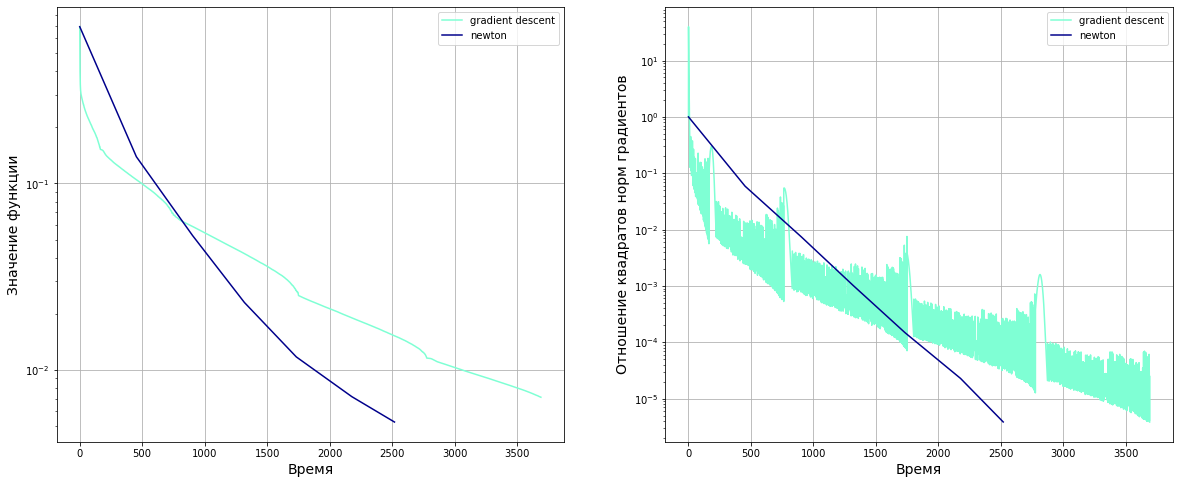

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
ax[0].plot(history_gd_['time'], history_gd_['func'], c = 'aquamarine', label = 'gradient descent')
ax[0].plot(history_newt_['time'], history_newt_['func'], c = 'darkblue', label = 'newton')
ax[0].set_xlabel('Время', fontsize = 14)
ax[0].set_ylabel('Значение функции', fontsize = 14)
ax[0].set_yscale('log')
ax[0].grid()
ax[0].legend()

norms_gd_ = history_gd_['grad_norm'] ** 2 / (history_gd_['grad_norm'][0]) ** 2
norms_newt_ = history_newt_['grad_norm'] ** 2 / (history_newt_['grad_norm'][0]) ** 2

ax[1].plot(history_gd_['time'], norms_gd_, c = 'aquamarine', label = 'gradient descent')
ax[1].plot(history_newt_['time'], norms_newt_, c = 'darkblue', label = 'newton')
ax[1].set_xlabel('Время', fontsize = 14)
ax[1].set_ylabel('Отношение квадратов норм градиентов', fontsize = 14)
ax[1].set_yscale('log')
ax[1].grid()
ax[1].legend()

При относительно небольшом объеме данных метод градиентного спуска и метод Ньютона показали практически идентичные результаты. При уже значительной большей размерности метод Ньютона оказался эффективнее метода градиентного спуска.